In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd


In [2]:
#Load, filter and concatenate individual variant libraries

control_df = pd.read_csv("control_library_20220618.csv", sep='\t')
aqtl_brain_df = pd.read_csv("aqtl_brain_variants_library_20220621.csv", sep='\t')
f2_df = pd.read_csv("gnomad_F2_rs1799963_only_variant_library_20220618.csv", sep='\t')
mecp2_df = pd.read_csv("gnomad_MECP2_only_variant_newnham_library_20220618.csv", sep='\t')
f2_control_df = pd.read_csv("gnomad_F2_rs1799963_control_only_variant_control_library_20220621.csv", sep='\t')
mecp2_control_df = pd.read_csv("gnomad_MECP2_Missing_control_only_variant_control_library_20220621.csv", sep='\t')
scaf8_control_df = pd.read_csv("gnomad_SCAF8_rs1778827900_control_only_variant_control_library_20220621.csv", sep='\t')
gwas_df = pd.read_csv("gwas_variant_library_small_20220618.csv", sep='\t')
asd1_df = pd.read_csv("asd_cohort_1_small_variant_library_no_outliers_76_vars_20220621.csv", sep='\t').drop(columns=['delta_logodds_0_205_orig'])
asd2_df = pd.read_csv("asd_cohort_2_scaf8_variant_library_20220618.csv", sep='\t').drop(columns=['delta_logodds_0_205_orig'])

variant_library_df = pd.concat([
    control_df,
    aqtl_brain_df,
    f2_df,
    mecp2_df,
    f2_control_df,
    mecp2_control_df,
    scaf8_control_df,
    gwas_df,
    asd1_df,
    asd2_df,
]).copy().reset_index(drop=True)

variant_library_df['ref_barcode'] = variant_library_df['ref_seq'].str.slice(0, 20)
variant_library_df['var_barcode'] = variant_library_df['var_seq'].str.slice(0, 20)

print("n = " + str(len(variant_library_df)))

print("n (unique gene_id) = " + str(len(variant_library_df['gene_id'].unique())))

print("n (unique ref_seq) = " + str(len(variant_library_df['ref_seq'].unique())))
print("n (unique var_seq) = " + str(len(variant_library_df['var_seq'].unique())))

print("n (unique ref_barcode) = " + str(len(variant_library_df['ref_barcode'].unique())))
print("n (unique var_barcode) = " + str(len(variant_library_df['var_barcode'].unique())))


n = 100
n (unique gene_id) = 96
n (unique ref_seq) = 100
n (unique var_seq) = 100
n (unique ref_barcode) = 100
n (unique var_barcode) = 100


In [3]:

variant_library_df


,gene,gene_id,chrom,strand,snp_id,data_source,experiment,pas_pos,pas_pos_hg38,var_position,...,ref_seq_w_homology,var_seq_w_homology,ref_logit_pred_77_127,var_logit_pred_77_127,delta_logodds_77_127,ref_logit_pred_0_205,var_logit_pred_0_205,delta_logodds_0_205,ref_barcode,var_barcode
0,CYP4F22,CYP4F22.1,Missing,Missing,Missing,Array_2019,control_CYP4F22.1,-1,-1,-1,...,TCCCTACACGACGCTCTTCCGATCTGATGCAGCTGGCTATCATGAA...,TCCCTACACGACGCTCTTCCGATCTGATGCAGCTGGCTATCATGAA...,-3.9338,-3.9338,0.0000,-3.6799,-3.6799,0.0000,GATGCAGCTGGCTATCATGA,GATGCAGCTGGCTATCATGA
1,BBS2,BBS2.3,Missing,Missing,Missing,Array_2019,control_BBS2.3,-1,-1,-1,...,TCCCTACACGACGCTCTTCCGATCTAAGGCATCAGTAATATGGCTT...,TCCCTACACGACGCTCTTCCGATCTAAGGCATCAGTAATATGGCTT...,-2.3712,-2.3712,0.0000,-0.1852,-0.1852,0.0000,AAGGCATCAGTAATATGGCT,AAGGCATCAGTAATATGGCT
2,CANT1,CANT1.3,Missing,Missing,Missing,Array_2019,control_CANT1.3,-1,-1,-1,...,TCCCTACACGACGCTCTTCCGATCTTCTAGCCGCTGTTTATTCCTC...,TCCCTACACGACGCTCTTCCGATCTTCTAGCCGCTGTTTATTCCTC...,-1.1134,-1.1134,0.0000,-1.0244,-1.0244,0.0000,TCTAGCCGCTGTTTATTCCT,TCTAGCCGCTGTTTATTCCT
3,COL4A4,COL4A4.1,Missing,Missing,Missing,Array_2019,control_COL4A4.1,-1,-1,-1,...,TCCCTACACGACGCTCTTCCGATCTACGTGGCCCAGTCGGCGCCAT...,TCCCTACACGACGCTCTTCCGATCTACGTGGCCCAGTCGGCGCCAT...,-0.1250,-0.1250,0.0000,-0.0756,-0.0756,0.0000,ACGTGGCCCAGTCGGCGCCA,ACGTGGCCCAGTCGGCGCCA
4,RYR2,RYR2.1,Missing,Missing,Missing,Array_2019,control_RYR2.1,-1,-1,-1,...,TCCCTACACGACGCTCTTCCGATCTATTAAGTTCTTCGCGCTACCG...,TCCCTACACGACGCTCTTCCGATCTATTAAGTTCTTCGCGCTACCG...,0.4506,0.4506,0.0000,0.5523,0.5523,0.0000,ATTAAGTTCTTCGCGCTACC,ATTAAGTTCTTCGCGCTACC
5,RB1,RB1.11,Missing,Missing,Missing,Array_2019,control_RB1.11,-1,-1,-1,...,TCCCTACACGACGCTCTTCCGATCTCCTAAGTGGGACATCCCCCAC...,TCCCTACACGACGCTCTTCCGATCTCCTAAGTGGGACATCCCCCAC...,1.8719,1.8719,0.0000,1.9306,1.9306,0.0000,CCTAAGTGGGACATCCCCCA,CCTAAGTGGGACATCCCCCA
6,CRLS1,CRLS1.9,chr20,+,rs2235816,aQTL,brain_specific_variant,6018668,-1,6018711,...,TCCCTACACGACGCTCTTCCGATCTTATCAAGCTGTATATTTTTCA...,TCCCTACACGACGCTCTTCCGATCTTATCAAGCTGTATATTTTTCA...,-1.2123,-0.5706,0.6417,-1.0708,-0.4649,0.6058,TATCAAGCTGTATATTTTTC,TATCAAGCTGTATATTTTTC
7,ALDH7A1,ALDH7A1.17,chr5,-,rs744722,aQTL,brain_specific_variant,125878941,-1,125878908,...,TCCCTACACGACGCTCTTCCGATCTAAACAAATTTATAATTTTTCT...,TCCCTACACGACGCTCTTCCGATCTAAACAAATTTATAATTTTTCT...,0.1354,-0.3175,-0.4529,0.2149,-0.2220,-0.4368,AAACAAATTTATAATTTTTC,AAACAAATTTATAATTTTTC
8,ALDH7A1,ALDH7A1.17,chr5,-,rs744722_control,aQTL,brain_specific_variant,125878941,-1,125878908,...,TCCCTACACGACGCTCTTCCGATCTCATCTACTTACCAGTTCCTGT...,TCCCTACACGACGCTCTTCCGATCTCATCTACTTACCAGTTCCTGT...,0.1896,0.2154,0.0258,0.2137,0.2391,0.0254,CATCTACTTACCAGTTCCTG,CATCTACTTACCAGTTCCTG
9,F2,F2.1,chr11,+,rs1799963,gnomAD_F2,variant,46761035,46739485,46761055,...,TCCCTACACGACGCTCTTCCGATCTCTCATATTCTGGGCTCCTGGA...,TCCCTACACGACGCTCTTCCGATCTCTCATATTCTGGGCTCCTGGA...,-1.2457,-0.9020,0.3437,-1.1440,-0.8214,0.3227,CTCATATTCTGGGCTCCTGG,CTCATATTCTGGGCTCCTGG


In [4]:
#Check hamming distances of barcodes (ref)

min_hamming_distance = 4
min_hamming_distance_found = 20

def _hamming(s1, s2) :
    distance = 0
    for j in range(len(s1)) :
        if s1[j] != s2[j] :
            distance += 1
    
    return distance

bc_min_a = "N/A"
bc_min_b = "N/A"

i = 0
for _, row_1 in variant_library_df.iterrows() :
    
    if i % 10 == 0:
        print("i = " + str(i) + ", min hamming distance found = " + str(min_hamming_distance_found) + ", " + bc_min_a + " vs " + bc_min_b)
    
    j = 0
    for _, row_2 in variant_library_df.iterrows() :
        
        if j > i :
            hamming_dist = _hamming(row_1['ref_barcode'], row_2['ref_barcode'])
            
            if hamming_dist < min_hamming_distance :
                print("[Warning, hamming distance = " + str(hamming_dist) + "] " + str(row_1['ref_barcode']) + " vs " + str(row_2['ref_barcode']))
            if hamming_dist < min_hamming_distance_found :
                
                bc_min_a = row_1['ref_barcode']
                bc_min_b = row_2['ref_barcode']
                min_hamming_distance_found = hamming_dist
        
        j += 1
    i += 1

print("Min hamming distance found = " + str(min_hamming_distance_found) + ", " + bc_min_a + " vs " + bc_min_b)


i = 0, min hamming distance found = 20, N/A vs N/A
i = 10, min hamming distance found = 7, AAACAAATTTATAATTTTTC vs ATACTCAGTTTTCAGTTTTC
i = 20, min hamming distance found = 7, AAACAAATTTATAATTTTTC vs ATACTCAGTTTTCAGTTTTC
i = 30, min hamming distance found = 7, AAACAAATTTATAATTTTTC vs ATACTCAGTTTTCAGTTTTC
i = 40, min hamming distance found = 7, AAACAAATTTATAATTTTTC vs ATACTCAGTTTTCAGTTTTC
i = 50, min hamming distance found = 7, AAACAAATTTATAATTTTTC vs ATACTCAGTTTTCAGTTTTC
i = 60, min hamming distance found = 7, AAACAAATTTATAATTTTTC vs ATACTCAGTTTTCAGTTTTC
i = 70, min hamming distance found = 7, AAACAAATTTATAATTTTTC vs ATACTCAGTTTTCAGTTTTC
i = 80, min hamming distance found = 7, AAACAAATTTATAATTTTTC vs ATACTCAGTTTTCAGTTTTC
i = 90, min hamming distance found = 7, AAACAAATTTATAATTTTTC vs ATACTCAGTTTTCAGTTTTC
Min hamming distance found = 7, AAACAAATTTATAATTTTTC vs ATACTCAGTTTTCAGTTTTC


In [5]:
#Check hamming distances of barcodes (var)

min_hamming_distance = 4
min_hamming_distance_found = 20

def _hamming(s1, s2) :
    distance = 0
    for j in range(len(s1)) :
        if s1[j] != s2[j] :
            distance += 1
    
    return distance

bc_min_a = "N/A"
bc_min_b = "N/A"

i = 0
for _, row_1 in variant_library_df.iterrows() :
    
    if i % 10 == 0:
        print("i = " + str(i) + ", min hamming distance found = " + str(min_hamming_distance_found) + ", " + bc_min_a + " vs " + bc_min_b)
    
    j = 0
    for _, row_2 in variant_library_df.iterrows() :
        
        if j > i :
            hamming_dist = _hamming(row_1['var_barcode'], row_2['var_barcode'])
            
            if hamming_dist < min_hamming_distance :
                print("[Warning, hamming distance = " + str(hamming_dist) + "] " + str(row_1['var_barcode']) + " vs " + str(row_2['var_barcode']))
            if hamming_dist < min_hamming_distance_found :
                
                bc_min_a = row_1['var_barcode']
                bc_min_b = row_2['var_barcode']
                min_hamming_distance_found = hamming_dist
        
        j += 1
    i += 1

print("Min hamming distance found = " + str(min_hamming_distance_found) + ", " + bc_min_a + " vs " + bc_min_b)


i = 0, min hamming distance found = 20, N/A vs N/A
i = 10, min hamming distance found = 7, AAACAAATTTATAATTTTTC vs ATACTCAGTTTTCAGTTTTC
i = 20, min hamming distance found = 7, AAACAAATTTATAATTTTTC vs ATACTCAGTTTTCAGTTTTC
i = 30, min hamming distance found = 7, AAACAAATTTATAATTTTTC vs ATACTCAGTTTTCAGTTTTC
i = 40, min hamming distance found = 7, AAACAAATTTATAATTTTTC vs ATACTCAGTTTTCAGTTTTC
i = 50, min hamming distance found = 7, AAACAAATTTATAATTTTTC vs ATACTCAGTTTTCAGTTTTC
i = 60, min hamming distance found = 7, AAACAAATTTATAATTTTTC vs ATACTCAGTTTTCAGTTTTC
i = 70, min hamming distance found = 7, AAACAAATTTATAATTTTTC vs ATACTCAGTTTTCAGTTTTC
i = 80, min hamming distance found = 7, AAACAAATTTATAATTTTTC vs ATACTCAGTTTTCAGTTTTC
i = 90, min hamming distance found = 7, AAACAAATTTATAATTTTTC vs ATACTCAGTTTTCAGTTTTC
Min hamming distance found = 7, AAACAAATTTATAATTTTTC vs ATACTCAGTTTTCAGTTTTC


In [6]:
#Check hamming distances of ref/var sequence pairs

min_hamming_distance = 1
min_hamming_distance_found = 100

def _hamming(s1, s2) :
    distance = 0
    for j in range(len(s1)) :
        if s1[j] != s2[j] :
            distance += 1
    
    return distance

variant_library_df['ref_var_hamming_dist'] = variant_library_df.apply(lambda row: _hamming(row['ref_seq'], row['var_seq']), axis=1)

print("Min hamming distance found = " + str(variant_library_df.query("data_source != 'Array_2019'")['ref_var_hamming_dist'].min()))

variant_library_df['ref_var_hamming_dist_w_homology'] = variant_library_df.apply(lambda row: _hamming(row['ref_seq_w_homology'], row['var_seq_w_homology']), axis=1)

print("Min hamming distance found = " + str(variant_library_df.query("data_source != 'Array_2019'")['ref_var_hamming_dist_w_homology'].min()))


Min hamming distance found = 1
Min hamming distance found = 1


In [7]:

pd.set_option('display.max_rows', None)

variant_library_df[['data_source', 'experiment', 'ref_var_hamming_dist', 'ref_var_hamming_dist_w_homology']]


,data_source,experiment,ref_var_hamming_dist,ref_var_hamming_dist_w_homology
0,Array_2019,control_CYP4F22.1,0,0
1,Array_2019,control_BBS2.3,0,0
2,Array_2019,control_CANT1.3,0,0
3,Array_2019,control_COL4A4.1,0,0
4,Array_2019,control_RYR2.1,0,0
5,Array_2019,control_RB1.11,0,0
6,aQTL,brain_specific_variant,1,1
7,aQTL,brain_specific_variant,1,1
8,aQTL,brain_specific_variant,1,1
9,gnomAD_F2,variant,1,1


In [8]:
#Load oligo array from 2019

import isolearn.io as isoio

isoform_pseudo_count = 1.
proximal_start = 77
proximal_end = 127

file_prefix = str(proximal_start) + "_" + str(proximal_end)

seq_dict = isoio.load('../../../../aparent/data/prepared_data/apa_array_data/apa_array_data_seq')

#Load predictions (Resnet)
model_name = 'aparent_all_libs_resnet_no_clinvar_wt_ep_5'
pred_dict = isoio.load('../../../analysis/predictions/apa_array_data_legacy/' + model_name + '_predictions_seq')


In [9]:

print("n (sequences) = " + str(len(seq_dict['array_df'])))


n (sequences) = 186066


In [10]:

seq_df = seq_dict['array_df']
seq_cuts = seq_dict['pooled_cuts']

pred_df = pred_dict['array_df']
cuts_pred = pred_dict['cut_prob']

seq_df['row_index_true'] = np.arange(len(seq_df), dtype=np.int)
pred_df['row_index_pred'] = np.arange(len(pred_df), dtype=np.int)

seq_df = seq_df.join(pred_df[['seq', 'row_index_pred']].set_index('seq'), on='seq', how='inner').copy().reset_index(drop=True)

seq_cuts = seq_cuts[np.ravel(seq_df['row_index_true'].values), :]
cut_true = np.concatenate([np.array(seq_cuts[:, 180: 180 + 205].todense()), np.array(seq_cuts[:, -1].todense()).reshape(-1, 1)], axis=-1)# - 1

seq_df['proximal_count'] = [np.sum(cut_true[i, proximal_start:proximal_end]) for i in range(len(seq_df))]
seq_df['total_count'] = [np.sum(cut_true[i, :]) for i in range(len(seq_df))]

seq_df['iso_true'] = (seq_df['proximal_count'] + isoform_pseudo_count) / (seq_df['total_count'] + 2. * isoform_pseudo_count)
seq_df['logodds_true'] = np.log(seq_df['iso_true'] / (1.0 - seq_df['iso_true']))

cut_pred = np.array(cuts_pred[np.ravel(seq_df['row_index_pred'].values), :].todense())

seq_df['iso_pred'] = [np.clip(np.sum(cut_pred[i, proximal_start:proximal_end]), 1e-6, 1. - 1e-6) for i in range(len(seq_df))]
seq_df['logodds_pred'] = np.log(seq_df['iso_pred'] / (1.0 - seq_df['iso_pred']))


In [11]:
#Filter on high quality

print("n (pre-filtering) = " + str(len(seq_df)))

seq_df = seq_df.query("n_barcodes >= 2 and mean_total_count >= 200 and variant == 'wt'").copy().reset_index(drop=True)
seq_df = seq_df.loc[seq_df['experiment'].isin([
    'sensitive_genes',
    #'tgta',
    'acmg_apadb',
    'human variant',
    #'intronic_pas',
    #'max_cut',
    #'max_iso',
    #'clinvar_mut',
    'acmg_polyadb',
    'clinvar_wt'
])].copy().reset_index(drop=True)

seq_df = seq_df.loc[~seq_df['seq'].str.contains("AAAAAAAAA|AAAAGAAAA|AAAACAAAA|AAAATAAAA")].copy().reset_index(drop=True)

print("n (post-filtering) = " + str(len(seq_df)))


n (pre-filtering) = 186066
n (post-filtering) = 4938


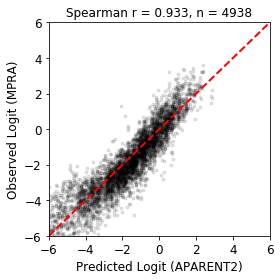

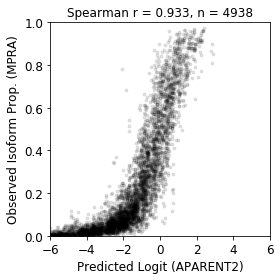

In [12]:
from scipy.stats import spearmanr, pearsonr

r_val = spearmanr(seq_df['logodds_pred'], seq_df['logodds_true'])[0]

f = plt.figure(figsize=(4, 4))

plt.scatter(seq_df['logodds_pred'], seq_df['logodds_true'], color='black', s=8, alpha=0.1)

plt.plot([-6., 6.], [-6. ,6.], linewidth=2, linestyle='--', color='red')

plt.xlim(-6., 6.)
plt.ylim(-6., 6.)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Predicted Logit (APARENT2)", fontsize=12)
plt.ylabel("Observed Logit (MPRA)", fontsize=12)

plt.title("Spearman r = " + str(round(r_val, 3)) + ", n = " + str(len(seq_df)))

plt.tight_layout()

plt.show()

f = plt.figure(figsize=(4, 4))

plt.scatter(seq_df['logodds_pred'], seq_df['iso_true'], color='black', s=8, alpha=0.1)

plt.xlim(-6., 6.)
plt.ylim(0., 1.)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Predicted Logit (APARENT2)", fontsize=12)
plt.ylabel("Observed Isoform Prop. (MPRA)", fontsize=12)

plt.title("Spearman r = " + str(round(r_val, 3)) + ", n = " + str(len(seq_df)))

plt.tight_layout()

plt.show()


lr.coef_ = [0.91713106]
lr.intercept_ = -0.23747837462409382
R^2 = 0.833


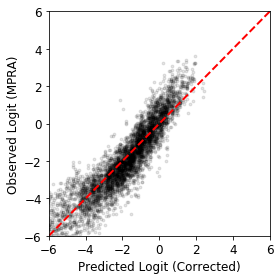

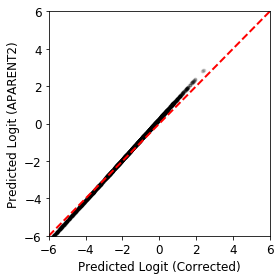

In [13]:
#Perform logit regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(
    np.array(seq_df['logodds_pred'].values)[:, None],
    np.array(seq_df['logodds_true'].values)
)

print("lr.coef_ = " + str(lr.coef_))
print("lr.intercept_ = " + str(lr.intercept_))

print("R^2 = " + str(round(lr.score(
    np.array(seq_df['logodds_pred'].values)[:, None],
    np.array(seq_df['logodds_true'].values)
), 3)))

seq_df['logodds_pred_corrected'] = np.ravel(lr.predict(np.array(seq_df['logodds_pred'].values)[:, None]))

f = plt.figure(figsize=(4, 4))

plt.scatter(seq_df['logodds_pred_corrected'], seq_df['logodds_true'], color='black', s=8, alpha=0.1)

plt.plot([-6., 6.], [-6. ,6.], linewidth=2, linestyle='--', color='red')

plt.xlim(-6., 6.)
plt.ylim(-6., 6.)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Predicted Logit (Corrected)", fontsize=12)
plt.ylabel("Observed Logit (MPRA)", fontsize=12)

plt.tight_layout()

plt.show()

f = plt.figure(figsize=(4, 4))

plt.scatter(seq_df['logodds_pred_corrected'], seq_df['logodds_pred'], color='black', s=8, alpha=0.1)

plt.plot([-6., 6.], [-6. ,6.], linewidth=2, linestyle='--', color='red')

plt.xlim(-6., 6.)
plt.ylim(-6., 6.)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Predicted Logit (Corrected)", fontsize=12)
plt.ylabel("Predicted Logit (APARENT2)", fontsize=12)

plt.tight_layout()

plt.show()


In [14]:
#Impute reporter-context isoform abundances for new library

variant_library_df['ref_logit_corrected_' + str(proximal_start) + "_" + str(proximal_end)] = np.ravel(lr.predict(np.array(variant_library_df['ref_logit_pred_' + str(proximal_start) + "_" + str(proximal_end)])[:, None]))
variant_library_df['var_logit_corrected_' + str(proximal_start) + "_" + str(proximal_end)] = np.ravel(lr.predict(np.array(variant_library_df['var_logit_pred_' + str(proximal_start) + "_" + str(proximal_end)])[:, None]))

variant_library_df['ref_iso_corrected_' + str(proximal_start) + "_" + str(proximal_end)] = 1. / (1. + np.exp(-variant_library_df['ref_logit_corrected_' + str(proximal_start) + "_" + str(proximal_end)]))
variant_library_df['var_iso_corrected_' + str(proximal_start) + "_" + str(proximal_end)] = 1. / (1. + np.exp(-variant_library_df['var_logit_corrected_' + str(proximal_start) + "_" + str(proximal_end)]))

variant_library_df['delta_iso_corrected_' + str(proximal_start) + "_" + str(proximal_end)] = variant_library_df['var_iso_corrected_' + str(proximal_start) + "_" + str(proximal_end)] - variant_library_df['ref_iso_corrected_' + str(proximal_start) + "_" + str(proximal_end)]


In [15]:

variant_library_df


,gene,gene_id,chrom,strand,snp_id,data_source,experiment,pas_pos,pas_pos_hg38,var_position,...,delta_logodds_0_205,ref_barcode,var_barcode,ref_var_hamming_dist,ref_var_hamming_dist_w_homology,ref_logit_corrected_77_127,var_logit_corrected_77_127,ref_iso_corrected_77_127,var_iso_corrected_77_127,delta_iso_corrected_77_127
0,CYP4F22,CYP4F22.1,Missing,Missing,Missing,Array_2019,control_CYP4F22.1,-1,-1,-1,...,0.0000,GATGCAGCTGGCTATCATGA,GATGCAGCTGGCTATCATGA,0,0,-3.845289,-3.845289,0.020933,0.020933,0.000000
1,BBS2,BBS2.3,Missing,Missing,Missing,Array_2019,control_BBS2.3,-1,-1,-1,...,0.0000,AAGGCATCAGTAATATGGCT,AAGGCATCAGTAATATGGCT,0,0,-2.412180,-2.412180,0.082249,0.082249,0.000000
2,CANT1,CANT1.3,Missing,Missing,Missing,Array_2019,control_CANT1.3,-1,-1,-1,...,0.0000,TCTAGCCGCTGTTTATTCCT,TCTAGCCGCTGTTTATTCCT,0,0,-1.258612,-1.258612,0.221213,0.221213,0.000000
3,COL4A4,COL4A4.1,Missing,Missing,Missing,Array_2019,control_COL4A4.1,-1,-1,-1,...,0.0000,ACGTGGCCCAGTCGGCGCCA,ACGTGGCCCAGTCGGCGCCA,0,0,-0.352120,-0.352120,0.412868,0.412868,0.000000
4,RYR2,RYR2.1,Missing,Missing,Missing,Array_2019,control_RYR2.1,-1,-1,-1,...,0.0000,ATTAAGTTCTTCGCGCTACC,ATTAAGTTCTTCGCGCTACC,0,0,0.175781,0.175781,0.543832,0.543832,0.000000
5,RB1,RB1.11,Missing,Missing,Missing,Array_2019,control_RB1.11,-1,-1,-1,...,0.0000,CCTAAGTGGGACATCCCCCA,CCTAAGTGGGACATCCCCCA,0,0,1.479299,1.479299,0.814467,0.814467,0.000000
6,CRLS1,CRLS1.9,chr20,+,rs2235816,aQTL,brain_specific_variant,6018668,-1,6018711,...,0.6058,TATCAAGCTGTATATTTTTC,TATCAAGCTGTATATTTTTC,1,1,-1.349316,-0.760793,0.205982,0.318474,0.112492
7,ALDH7A1,ALDH7A1.17,chr5,-,rs744722,aQTL,brain_specific_variant,125878941,-1,125878908,...,-0.4368,AAACAAATTTATAATTTTTC,AAACAAATTTATAATTTTTC,1,1,-0.113299,-0.528667,0.471706,0.370828,-0.100878
8,ALDH7A1,ALDH7A1.17,chr5,-,rs744722_control,aQTL,brain_specific_variant,125878941,-1,125878908,...,0.0254,CATCTACTTACCAGTTCCTG,CATCTACTTACCAGTTCCTG,1,1,-0.063590,-0.039928,0.484108,0.490019,0.005911
9,F2,F2.1,chr11,+,rs1799963,gnomAD_F2,variant,46761035,46739485,46761055,...,0.3227,CTCATATTCTGGGCTCCTGG,CTCATATTCTGGGCTCCTGG,1,1,-1.379949,-1.064731,0.201017,0.256406,0.055389


In [16]:

variant_library_df.to_csv("apa_100_variants_rev2_20220621_pred.csv", index=False, sep='\t')
